In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
import pickle

import seaborn as sns
sns.set()
from matplotlib import style
style.use('ggplot')

In [2]:
with open('data/sp500tickers.pickle', 'rb') as f:
    tickers = pickle.load(f)
len(tickers)

505

In [3]:
prices = pd.read_csv('sp500_closes.csv', index_col='Date', parse_dates=True)
prices.tail()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-03,155.229996,81.070000,73.849998,167.029999,185.809998,54.070000,272.399994,28.68,159.860001,15.800000,...,184.990005,109.860001,NaN,29.330000,92.489998,75.120003,NaN,132.940002,42.689999,124.279999
2019-10-04,155.820007,81.989998,74.660004,169.250000,189.639999,55.439999,276.959991,29.01,159.940002,16.030001,...,188.649994,108.910004,NaN,29.590000,94.239998,75.970001,NaN,134.449997,43.200001,127.050003
2019-10-07,153.520004,81.040001,74.330002,164.429993,186.809998,55.410000,276.899994,28.93,158.270004,15.850000,...,187.589996,107.019997,NaN,29.830000,92.629997,75.570000,NaN,134.500000,43.439999,126.070000
2019-10-08,150.740005,78.510002,73.529999,159.490005,182.199997,54.130001,270.829987,28.23,154.330002,15.510000,...,184.360001,102.570000,63.59,28.309999,89.269997,73.430000,112.589996,131.220001,42.209999,NaN
2019-10-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
prices = prices[:-1]
daily_rets = prices.copy()
daily_rets.values[1:, :] = prices.values[1:, :] - prices.values[:-1, :]
daily_rets.values[0, :] = np.nan  
daily_rets = daily_rets[1:-1]
daily_rets = daily_rets.reset_index()
daily_rets

,Date,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
0,2013-01-03,-0.092567,1.063025,-0.224545,-0.240000,-0.215694,0.056498,-0.590000,-0.040000,0.000000,...,0.806335,1.053009,-0.062786,0.000000,-0.059914,-0.081821,0.264473,0.913662,0.027740,NaN
1,2013-01-04,0.589066,-0.174267,-0.340698,-0.040000,0.327843,0.150659,0.380001,0.100000,1.115913,...,-0.023003,1.193977,0.078478,-0.172803,-0.445198,-0.036358,0.465931,0.329666,0.582508,NaN
2,2013-01-07,0.100967,0.235254,0.054207,-0.160000,-0.258820,0.009417,-0.190002,0.080000,-0.246887,...,-0.230385,0.339966,-0.227570,0.259205,-0.128422,-0.327265,-0.270763,0.160110,-0.101709,NaN
3,2013-01-08,0.008423,0.008711,-0.580725,-0.040000,0.345085,-0.178907,0.200001,0.000000,-1.185066,...,-0.391663,-0.082909,0.039225,-0.021598,-0.633520,-0.299990,-1.794487,0.094215,-0.416080,NaN
4,2013-01-09,0.765778,0.191696,0.147120,-0.370000,0.422726,-0.047081,0.520000,-0.040000,0.217278,...,-0.023041,0.356537,0.031391,0.000000,0.239716,0.381809,0.072769,1.205612,-0.221907,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,2019-10-01,-6.019989,-1.830002,-2.489998,-7.679993,-2.730011,-0.019997,-3.540009,-0.230000,1.889999,...,-5.040009,1.199997,NaN,-0.440001,-3.860001,-2.790001,NaN,-3.660004,-1.549999,0.530006
1698,2019-10-02,-2.730011,-2.309998,-1.100006,-6.820007,-4.769989,-0.650002,-6.049988,-0.450001,-4.329987,...,-3.719986,1.270004,NaN,-0.500000,0.409996,-2.220001,NaN,-1.660004,-0.710003,-2.830002
1699,2019-10-03,-0.419998,1.540001,1.720001,3.639999,0.959991,1.820000,5.739990,0.370001,-3.100006,...,0.779999,-1.330002,NaN,0.360001,0.040001,0.510002,NaN,0.990005,0.430000,1.989998
1700,2019-10-04,0.590012,0.919998,0.810005,2.220001,3.830002,1.369999,4.559998,0.330000,0.080002,...,3.659988,-0.949997,NaN,0.260000,1.750000,0.849998,NaN,1.509995,0.510002,2.770004


In [5]:
# df = prices.T
df = daily_rets.T
header = df.iloc[0]
df = df[1:].rename(columns=header)
df = df.reset_index()
df.head()

,index,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-07 00:00:00,2013-01-08 00:00:00,2013-01-09 00:00:00,2013-01-10 00:00:00,2013-01-11 00:00:00,2013-01-14 00:00:00,2013-01-15 00:00:00,...,2019-09-24 00:00:00,2019-09-25 00:00:00,2019-09-26 00:00:00,2019-09-27 00:00:00,2019-09-30 00:00:00,2019-10-01 00:00:00,2019-10-02 00:00:00,2019-10-03 00:00:00,2019-10-04 00:00:00,2019-10-07 00:00:00
0,MMM,-0.0925674,0.589066,0.100967,0.00842285,0.765778,0.403908,-0.513313,0.673195,0.176735,...,-2.01999,-0.740005,-0.169998,0.699997,-0.130005,-6.01999,-2.73001,-0.419998,0.590012,-2.3
1,ABT,1.06302,-0.174267,0.235254,0.00871086,0.191696,0.243971,-0.297478,-0.00875473,-0.29748,...,-0.720001,0.419998,-0.199997,-0.820007,1.83,-1.83,-2.31,1.54,0.919998,-0.949997
2,ABBV,-0.224545,-0.340698,0.0542068,-0.580725,0.14712,0.0774193,0.195881,0.188053,0.39959,...,0.0199966,-0.860001,1.94,0.82,0.870003,-2.49,-1.10001,1.72,0.810005,-0.330002
3,ABMD,-0.24,-0.04,-0.16,-0.04,-0.37,-0.04,-0.55,0.0699997,-0.15,...,-1.65999,0.929993,-7.63,-1.75999,2,-7.67999,-6.82001,3.64,2.22,-4.82001
4,ACN,-0.215694,0.327843,-0.25882,0.345085,0.422726,-0.526249,0.612526,-0.0172615,0.33646,...,-2.7,0.729996,1.25,-0.73999,0.970001,-2.73001,-4.76999,0.959991,3.83,-2.83


In [6]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [7]:
dates = df.columns[1:]
dates[len(dates)-1]

Timestamp('2019-10-07 00:00:00')

In [8]:
pred_steps = 30
data_start_date = dates[1]
data_end_date = dates[-1]

val_pred_start = dates[len(dates) - pred_steps]
val_pred_end = dates[len(dates) - 1]

train_pred_start = dates[len(dates) - 2*pred_steps]
train_pred_end = dates[len(dates) - pred_steps - 1]

enc_length = len(dates) - 2 * pred_steps
train_enc_start = dates[0]
train_enc_end = dates[enc_length - 1]

val_enc_start = dates[pred_steps]
val_enc_end = dates[pred_steps + enc_length - 1]

print('Train encoding:', train_enc_start, '-', train_enc_end)
print('Train prediction:', train_pred_start, '-', train_pred_end, '\n')
print('Val encoding:', val_enc_start, '-', val_enc_end)
print('Val prediction:', val_pred_start, '-', val_pred_end)

Train encoding: 2013-01-03 00:00:00 - 2019-07-12 00:00:00
Train prediction: 2019-07-15 00:00:00 - 2019-08-23 00:00:00 

Val encoding: 2013-02-15 00:00:00 - 2019-08-23 00:00:00
Val prediction: 2019-08-26 00:00:00 - 2019-10-07 00:00:00


In [9]:
date_to_index = pd.Series(index=pd.Index([pd.to_datetime(c) for c in df.columns[1:]]),
                          data=[i for i in range(len(df.columns[1:]))])

series_array = np.array(df[df.columns[1:]].values, dtype=np.float)

def get_time_block_series(series_array, date_to_index, start_date, end_date):
    
    inds = date_to_index[start_date:end_date]
    return series_array[:,inds]

def transform_series_encode(series_array):
    
#     series_array = np.log1p(np.nan_to_num(series_array)) # filling NaN with 0
    series_array = np.nan_to_num(series_array) # filling NaN with 0
    series_mean = series_array.mean(axis=1).reshape(-1,1) 
    series_array = series_array - series_mean
    series_array = series_array.reshape((series_array.shape[0],series_array.shape[1], 1))
    
    return series_array, series_mean

def transform_series_decode(series_array, encode_series_mean):
    
#     series_array = np.log1p(np.nan_to_num(series_array)) # filling NaN with 0
    series_array = np.nan_to_num(series_array) # filling NaN with 0
    series_array = series_array - encode_series_mean
    series_array = series_array.reshape((series_array.shape[0],series_array.shape[1], 1))
    
    return series_array

In [10]:
# sample of series from train_enc_start to train_enc_end  
encoder_input_data = get_time_block_series(series_array, date_to_index, 
                                           train_enc_start, train_enc_end)#[:first_n_samples]
encoder_input_data, encode_series_mean = transform_series_encode(encoder_input_data)

# sample of series from train_pred_start to train_pred_end 
decoder_target_data = get_time_block_series(series_array, date_to_index, 
                                            train_pred_start, train_pred_end)#[:first_n_samples]
decoder_target_data = transform_series_decode(decoder_target_data, encode_series_mean)

print(encoder_input_data.shape, encode_series_mean.shape, decoder_target_data.shape)

(503, 1642, 1) (503, 1) (503, 30, 1)


# VAR model

In [29]:
# model = sm.tsa.VARMAX(encoder_input_data, order=(5, 0), trend='c')
# model_result = model.fit(maxiter=1000, disp=False)
# model_result.summary()
from statsmodels.tsa.vector_ar.var_model import VAR

vtrain = encoder_input_data.reshape(1642, 503)
var_model = VAR(endog=vtrain)
var_fit = model.fit()

# make prediction on validation
var_preds = var_fit.forecast(var_fit.y, steps=pred_steps)

/nfs_shares/xzw0005_home/conda_envs/fastai/lib/python3.6/site-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [34]:
var_fit.summary()

MemoryError: 

In [26]:
vtrain = encoder_input_data.squeeze(axis=-1).T
vtrain.shape, encoder_input_data.shape

((1642, 503), (503, 1642, 1))

In [25]:
vtest = decoder_target_data.squeeze(axis=-1).T
vtest.shape

(30, 503)

In [31]:
vtest

array([[-0.55150336, -0.14410158, -0.03624239, ...,  1.26323887,
        -1.01730519,  0.20866255],
       [ 3.56087762, -0.68409487, -1.13623323, ...,  0.15518376,
         0.10338039, -0.14083238],
       [-1.85953254,  2.5658975 , -0.86624422, ...,  0.89388463,
        -0.62059956,  0.14874129],
       ...,
       [ 0.08396417,  0.32589964,  1.103757  , ..., -0.55357173,
         0.43437023,  1.53903059],
       [-0.32602424, -0.56409975, -0.04624452, ..., -0.35392574,
         0.19436855, -1.05096575],
       [-5.086034  , -2.47410341, -1.57623567, ..., -3.49839595,
        -1.12563114, -3.62096544]])

In [10]:
from keras.models import Model
from keras.layers import Input, Conv1D, Dense, Activation, Dropout, Lambda, Multiply, Add, Concatenate, BatchNormalization
# from keras.optimizers import Adam
from keras import optimizers

Using TensorFlow backend.


In [11]:
# convolutional operation parameters
n_filters = 32 # 32 
filter_width = 2
dilation_rates = [2**i for i in range(8)] * 2 

# define an input history series and pass it through a stack of dilated causal convolution blocks. 
history_seq = Input(shape=(None, 1))
x = history_seq

skips = []
for dilation_rate in dilation_rates:
    
    # preprocessing - equivalent to time-distributed dense
    x = Conv1D(16, 1, padding='same', activation='relu')(x) 
    
    # filter convolution
    x_f = Conv1D(filters=n_filters,
                 kernel_size=filter_width, 
                 padding='causal',
                 dilation_rate=dilation_rate)(x)
    
    # gating convolution
    x_g = Conv1D(filters=n_filters,
                 kernel_size=filter_width, 
                 padding='causal',
                 dilation_rate=dilation_rate)(x)
    
    # multiply filter and gating branches
    z = Multiply()([Activation('tanh')(x_f),
                    Activation('sigmoid')(x_g)])
    
    # postprocessing - equivalent to time-distributed dense
    z = Conv1D(16, 1, padding='same', activation='relu')(z)
    
    # residual connection
    x = Add()([x, z])    
    
    # collect skip connections
    skips.append(z)

# add all skip connection outputs 
out = Activation('relu')(Add()(skips))

# final time-distributed dense layers 
out = Conv1D(128, 1, padding='same')(out)
out = Activation('relu')(out)
out = Dropout(.2)(out)
out = Conv1D(1, 1, padding='same')(out)

# extract the last 60 time steps as the training target
def slice(x, seq_length):
    return x[:,-seq_length:,:]

pred_seq_train = Lambda(slice, arguments={'seq_length':pred_steps})(out)

model = Model(history_seq, pred_seq_train)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, 1)      0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, None, 16)     32          input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, None, 32)     1056        conv1d_1[0][0]                   
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, None, 32)     1056        conv1d_1[0][0]                   
____________________

In [12]:
batch_size = 2**8
epochs = 50

# sample of series from train_enc_start to train_enc_end  
encoder_input_data = get_time_block_series(series_array, date_to_index, 
                                           train_enc_start, train_enc_end)#[:first_n_samples]
encoder_input_data, encode_series_mean = transform_series_encode(encoder_input_data)

# sample of series from train_pred_start to train_pred_end 
decoder_target_data = get_time_block_series(series_array, date_to_index, 
                                            train_pred_start, train_pred_end)#[:first_n_samples]
decoder_target_data = transform_series_decode(decoder_target_data, encode_series_mean)

# we append a lagged history of the target series to the input data, 
# so that we can train with teacher forcing
lagged_target_history = decoder_target_data[:,:-1,:1]
encoder_input_data = np.concatenate([encoder_input_data, lagged_target_history], axis=1)

adam = optimizers.Adam(lr=1e-2)
model.compile(optimizer=adam, loss='mean_absolute_error')
history = model.fit(encoder_input_data, decoder_target_data,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 452 samples, validate on 51 samples
Epoch 1/50
452/452 [==============================] - 9s 20ms/step - loss: 1.7658 - val_loss: 1.3935
Epoch 2/50
452/452 [==============================] - 1s 1ms/step - loss: 1.7404 - val_loss: 1.3985
Epoch 3/50
452/452 [==============================] - 1s 1ms/step - loss: 1.7418 - val_loss: 1.3922
Epoch 4/50
452/452 [==============================] - 1s 1ms/step - loss: 1.7337 - val_loss: 1.3896
Epoch 5/50
452/452 [==============================] - 1s 1ms/step - loss: 1.7289 - val_loss: 1.3866
Epoch 6/50
452/452 [==============================] - 1s 1ms/step - loss: 1.7213 - val_loss: 1.3776
Epoch 7/50
452/452 [==============================] - 1s 1ms/step - loss: 1.7124 - val_loss: 1.3648
Epoch 8/50
452/452 [==============================] - 1s 1ms/step - loss: 1.7027 - val_loss: 1.3483
Epoch 9/50
452/452 [==============================] - 1s 1ms/step - loss: 1.6848 - val_loss: 1.3301
Epoch 

In [13]:
adam = optimizers.Adam(lr=1e-3)
model.compile(optimizer=adam, loss='mean_absolute_error')
history = model.fit(encoder_input_data, decoder_target_data,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)

Train on 452 samples, validate on 51 samples
Epoch 1/50
452/452 [==============================] - 6s 14ms/step - loss: 1.2553 - val_loss: 1.1503
Epoch 2/50
452/452 [==============================] - 1s 1ms/step - loss: 1.2505 - val_loss: 1.1452
Epoch 3/50
452/452 [==============================] - 1s 1ms/step - loss: 1.2311 - val_loss: 1.1457
Epoch 4/50
452/452 [==============================] - 1s 1ms/step - loss: 1.2287 - val_loss: 1.1517
Epoch 5/50
452/452 [==============================] - 1s 1ms/step - loss: 1.2278 - val_loss: 1.1472
Epoch 6/50
452/452 [==============================] - 1s 1ms/step - loss: 1.2189 - val_loss: 1.1430
Epoch 7/50
452/452 [==============================] - 1s 1ms/step - loss: 1.2139 - val_loss: 1.1431
Epoch 8/50
452/452 [==============================] - 1s 1ms/step - loss: 1.2105 - val_loss: 1.1432
Epoch 9/50
452/452 [==============================] - 1s 1ms/step - loss: 1.2064 - val_loss: 1.1449
Epoch 10/50
452/452 [==============================] -

In [14]:
def predict_sequence(input_sequence):

    history_sequence = input_sequence.copy()
    pred_sequence = np.zeros((1,pred_steps,1)) # initialize output (pred_steps time steps)  
    
    for i in range(pred_steps):
        
        # record next time step prediction (last time step of model output) 
        last_step_pred = model.predict(history_sequence)[0,-1,0]
        pred_sequence[0,i,0] = last_step_pred
        
        # add the next time step prediction to the history sequence
        history_sequence = np.concatenate([history_sequence, 
                                           last_step_pred.reshape(-1,1,1)], axis=1)

    return pred_sequence

In [15]:
encoder_input_data = get_time_block_series(series_array, date_to_index, val_enc_start, val_enc_end)
encoder_input_data, encode_series_mean = transform_series_encode(encoder_input_data)

decoder_target_data = get_time_block_series(series_array, date_to_index, val_pred_start, val_pred_end)
decoder_target_data = transform_series_decode(decoder_target_data, encode_series_mean)

In [16]:
def predict_and_plot(encoder_input_data, decoder_target_data, sample_ind, enc_tail_len=50):

    encode_series = encoder_input_data[sample_ind:sample_ind+1,:,:] 
    pred_series = predict_sequence(encode_series)
    
    encode_series = encode_series.reshape(-1,1)
    pred_series = pred_series.reshape(-1,1)   
    target_series = decoder_target_data[sample_ind,:,:1].reshape(-1,1) 
    
    encode_series_tail = np.concatenate([encode_series[-enc_tail_len:],target_series[:1]])
    x_encode = encode_series_tail.shape[0]
    
    plt.figure(figsize=(10,6))   
    
    plt.plot(range(1,x_encode+1),encode_series_tail)
    plt.plot(range(x_encode,x_encode+pred_steps),target_series,color='orange')
    plt.plot(range(x_encode,x_encode+pred_steps),pred_series,color='teal',linestyle='--')
    
    plt.title('Pred vs Actual, %s' % tickers[sample_ind])
    plt.legend(['Encoding Series','Target Series','Predictions'])

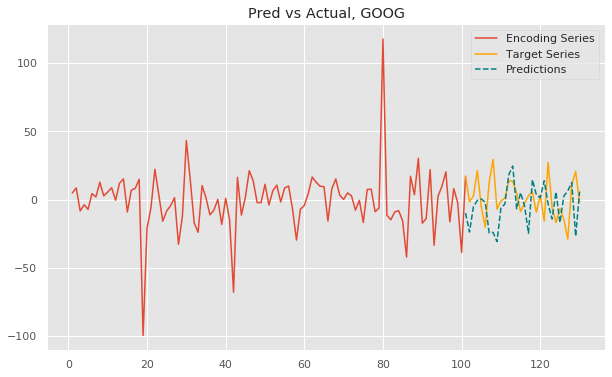

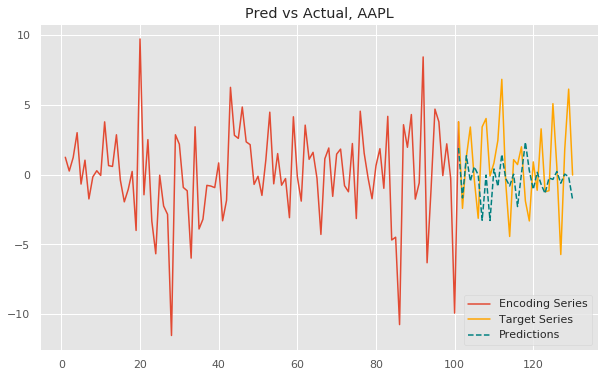

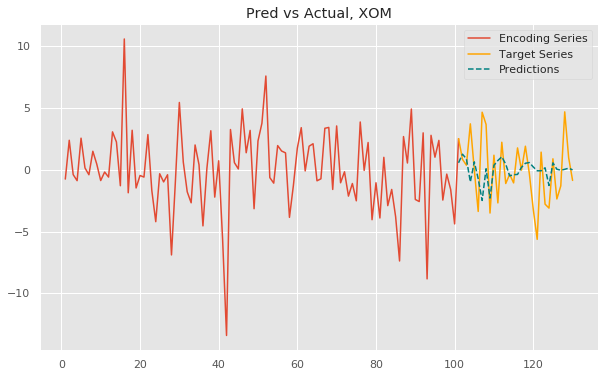

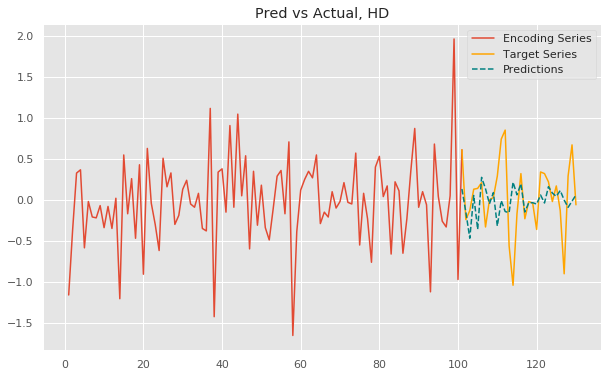

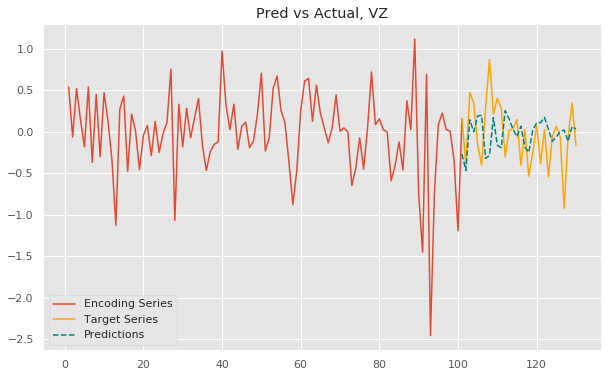

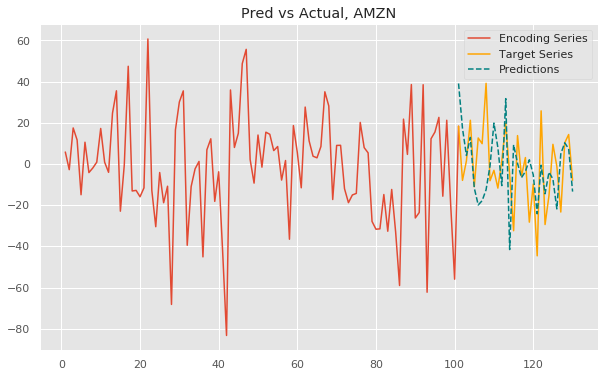

In [17]:
vis_ticks = ['GOOG', 'AAPL', 'XOM', 'HD', 'VZ', 'AMZN']
for ticker in vis_ticks:
    i = tickers.index(ticker)
    predict_and_plot(encoder_input_data, decoder_target_data, 
                 sample_ind=i, enc_tail_len=100)

# RNN

In [22]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense
from keras.optimizers import Adam

latent_dim = 50 # LSTM hidden units
dropout = .20 

# Define an input series and encode it with an LSTM. 
encoder_inputs = Input(shape=(None, 1)) 
encoder = LSTM(latent_dim, dropout=dropout, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)

# We discard `encoder_outputs` and only keep the final states. These represent the "context"
# vector that we use as the basis for decoding.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
# This is where teacher forcing inputs are fed in.
decoder_inputs = Input(shape=(None, 1)) 

# We set up our decoder using `encoder_states` as initial state.  
# We return full output sequences and return internal states as well. 
# We don't use the return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, dropout=dropout, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)

decoder_dense = Dense(1) # 1 continuous output at each timestep
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [23]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, None, 1)      0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            (None, None, 1)      0                                            
__________________________________________________________________________________________________
lstm_3 (LSTM)                   [(None, 50), (None,  10400       input_4[0][0]                    
__________________________________________________________________________________________________
lstm_4 (LSTM)                   [(None, None, 50), ( 10400       input_5[0][0]                    
                                                                 lstm_3[0][1]               

In [24]:
batch_size = 2**8
epochs = 20

# sample of series from train_enc_start to train_enc_end  
encoder_input_data = get_time_block_series(series_array, date_to_index, 
                                           train_enc_start, train_enc_end)#[:first_n_samples]
encoder_input_data, encode_series_mean = transform_series_encode(encoder_input_data)

# sample of series from train_pred_start to train_pred_end 
decoder_target_data = get_time_block_series(series_array, date_to_index, 
                                            train_pred_start, train_pred_end)#[:first_n_samples]
decoder_target_data = transform_series_decode(decoder_target_data, encode_series_mean)

# lagged target series for teacher forcing
decoder_input_data = np.zeros(decoder_target_data.shape)
decoder_input_data[:,1:,0] = decoder_target_data[:,:-1,0]
decoder_input_data[:,0,0] = encoder_input_data[:,-1,0]

adam = optimizers.Adam(lr=1e-2)
model.compile(optimizer=adam, loss='mean_absolute_error')
history = model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
                     batch_size=batch_size,
                     epochs=epochs,
                     validation_split=0.1)

Train on 452 samples, validate on 51 samples
Epoch 1/20
452/452 [==============================] - 4s 10ms/step - loss: 1.7400 - val_loss: 1.3883
Epoch 2/20
452/452 [==============================] - 3s 6ms/step - loss: 1.7356 - val_loss: 1.3863
Epoch 3/20
452/452 [==============================] - 3s 6ms/step - loss: 1.7318 - val_loss: 1.3859
Epoch 4/20
452/452 [==============================] - 3s 6ms/step - loss: 1.7326 - val_loss: 1.3849
Epoch 5/20
452/452 [==============================] - 3s 6ms/step - loss: 1.7303 - val_loss: 1.3805
Epoch 6/20
452/452 [==============================] - 3s 6ms/step - loss: 1.7248 - val_loss: 1.3697
Epoch 7/20
452/452 [==============================] - 3s 6ms/step - loss: 1.7199 - val_loss: 1.3694
Epoch 8/20
452/452 [==============================] - 3s 6ms/step - loss: 1.7159 - val_loss: 1.3590
Epoch 9/20
452/452 [==============================] - 3s 6ms/step - loss: 1.7060 - val_loss: 1.3499
Epoch 10/20
452/452 [==============================] -

Train on 452 samples, validate on 51 samples
Epoch 1/80
452/452 [==============================] - 4s 10ms/step - loss: 1.5835 - val_loss: 1.2158
Epoch 2/80
452/452 [==============================] - 3s 6ms/step - loss: 1.5750 - val_loss: 1.2016
Epoch 3/80
452/452 [==============================] - 3s 6ms/step - loss: 1.5728 - val_loss: 1.1994
Epoch 4/80
452/452 [==============================] - 3s 6ms/step - loss: 1.5772 - val_loss: 1.2010
Epoch 5/80
452/452 [==============================] - 3s 6ms/step - loss: 1.5694 - val_loss: 1.1995
Epoch 6/80
452/452 [==============================] - 3s 6ms/step - loss: 1.5746 - val_loss: 1.1953
Epoch 7/80
452/452 [==============================] - 3s 6ms/step - loss: 1.5680 - val_loss: 1.1934
Epoch 8/80
452/452 [==============================] - 3s 6ms/step - loss: 1.5605 - val_loss: 1.1939
Epoch 9/80
452/452 [==============================] - 3s 6ms/step - loss: 1.5639 - val_loss: 1.1886
Epoch 10/80
452/452 [==============================] -

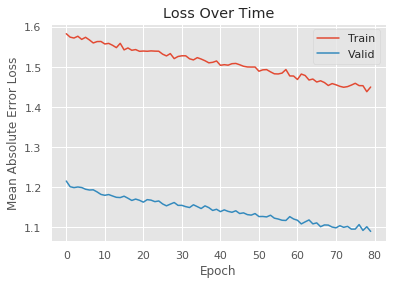

In [25]:
adam = optimizers.Adam(lr=1e-3)
model.compile(optimizer=adam, loss='mean_absolute_error')
history = model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
                     batch_size=batch_size,
                     epochs=80,
                     validation_split=0.1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error Loss')
plt.title('Loss Over Time')
plt.legend(['Train','Valid'])

In [26]:
# from our previous model - mapping encoder sequence to state vectors
encoder_model = Model(encoder_inputs, encoder_states)

# A modified version of the decoding stage that takes in predicted target inputs
# and encoded state vectors, returning predicted target outputs and decoder state vectors.
# We need to hang onto these state vectors to run the next step of the inference loop.
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]

decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model([decoder_inputs] + decoder_states_inputs,
                      [decoder_outputs] + decoder_states)

def decode_sequence(input_seq):
    
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, 1))
    
    # Populate the first target sequence with end of encoding series pageviews
    target_seq[0, 0, 0] = input_seq[0, -1, 0]

    # Sampling loop for a batch of sequences - we will fill decoded_seq with predictions
    # (to simplify, here we assume a batch of size 1).

    decoded_seq = np.zeros((1,pred_steps,1))
    
    for i in range(pred_steps):
        
        output, h, c = decoder_model.predict([target_seq] + states_value)
        
        decoded_seq[0,i,0] = output[0,0,0]

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, 1))
        target_seq[0, 0, 0] = output[0,0,0]

        # Update states
        states_value = [h, c]

    return decoded_seq

In [27]:
encoder_input_data = get_time_block_series(series_array, date_to_index, val_enc_start, val_enc_end)
encoder_input_data, encode_series_mean = transform_series_encode(encoder_input_data)

decoder_target_data = get_time_block_series(series_array, date_to_index, val_pred_start, val_pred_end)
decoder_target_data = transform_series_decode(decoder_target_data, encode_series_mean)

In [32]:
def predict_and_plot(encoder_input_data, decoder_target_data, sample_ind, enc_tail_len=50):

    encode_series = encoder_input_data[sample_ind:sample_ind+1,:,:] 
    pred_series = decode_sequence(encode_series)
    
    encode_series = encode_series.reshape(-1,1)
    pred_series = pred_series.reshape(-1,1)   
    target_series = decoder_target_data[sample_ind,:,:1].reshape(-1,1) 
    
    encode_series_tail = np.concatenate([encode_series[-enc_tail_len:],target_series[:1]])
    x_encode = encode_series_tail.shape[0]
    
#     plt.figure(figsize=(10,6))   
    
#     plt.plot(range(1,x_encode+1),encode_series_tail)
#     plt.plot(range(x_encode,x_encode+pred_steps),target_series,color='orange')
#     plt.plot(range(x_encode,x_encode+pred_steps),pred_series,color='teal',linestyle='--')
    
#     plt.title('Encoder Series Tail of Length %d, Target Series, and Predictions' % enc_tail_len)
#     plt.legend(['Encoding Series','Target Series','Predictions'])
    
# def predict_and_plot(encoder_input_data, decoder_target_data, sample_ind, enc_tail_len=50):

#     encode_series = encoder_input_data[sample_ind:sample_ind+1,:,:] 
#     pred_series = predict_sequence(encode_series)
    
#     encode_series = encode_series.reshape(-1,1)
#     pred_series = pred_series.reshape(-1,1)   
#     target_series = decoder_target_data[sample_ind,:,:1].reshape(-1,1) 
    
#     encode_series_tail = np.concatenate([encode_series[-enc_tail_len:],target_series[:1]])
#     x_encode = encode_series_tail.shape[0]
    
    plt.figure(figsize=(10,6))   
    
    plt.plot(range(1,x_encode+1),encode_series_tail)
    plt.plot(range(x_encode,x_encode+pred_steps),target_series,color='orange')
    plt.plot(range(x_encode,x_encode+pred_steps),pred_series,color='teal',linestyle='--')
    
    plt.title('Pred vs Actual, %s' % tickers[sample_ind])
    plt.legend(['Encoding Series','Target Series','Predictions'])

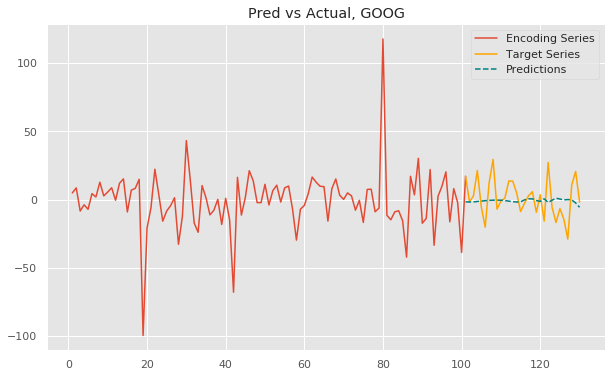

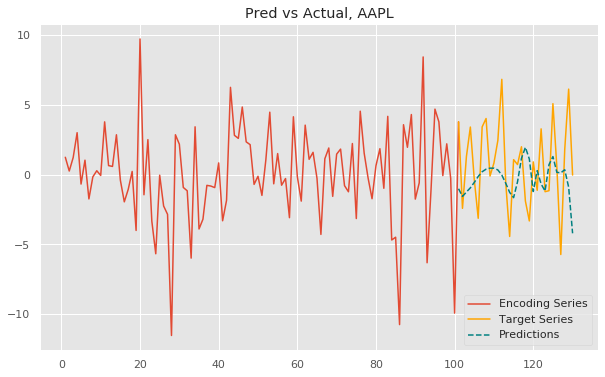

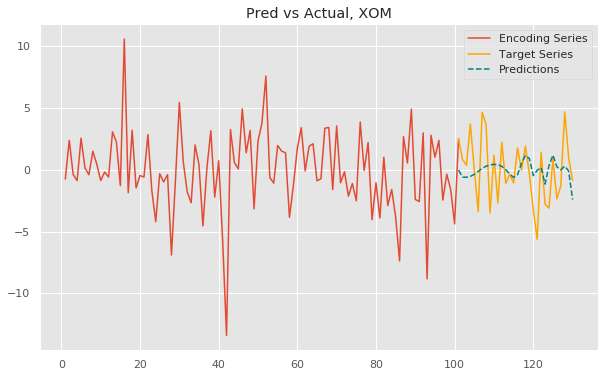

In [ ]:
vis_ticks = ['GOOG', 'AAPL', 'XOM', 'HD', 'VZ', 'AMZN']
for ticker in vis_ticks:
    i = tickers.index(ticker)
    predict_and_plot(encoder_input_data, decoder_target_data, 
                 sample_ind=i, enc_tail_len=100)